<a href="https://colab.research.google.com/github/SoniAryan3038/AI_Assignment_Repository/blob/main/ExplainableAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install numpy pandas scikit-learn matplotlib seaborn

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        81

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



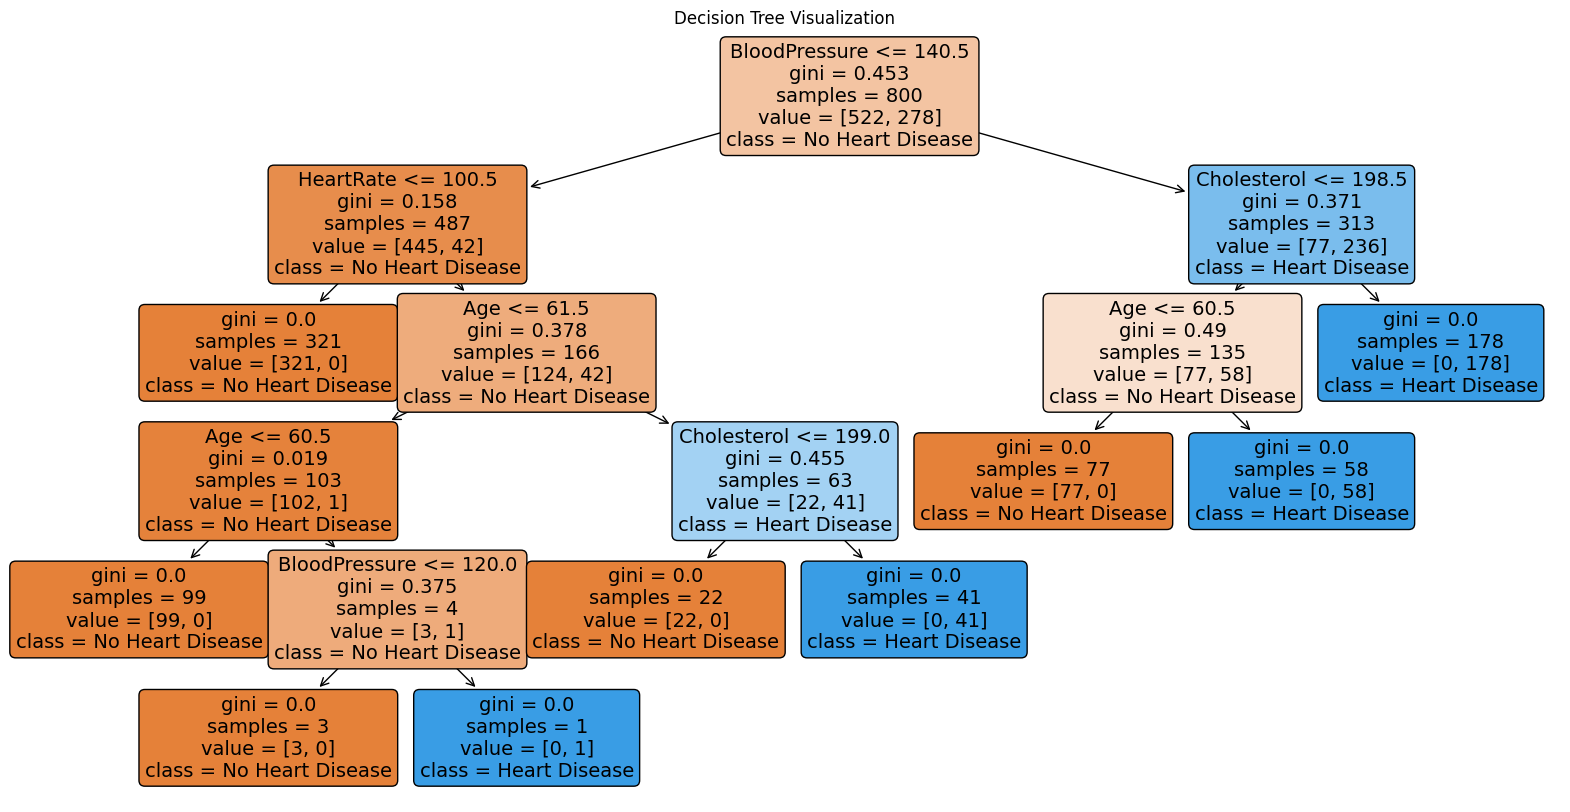


Sample data:
Age               53
BloodPressure    128
Cholesterol      192
HeartRate         98
Name: 521, dtype: int64

Prediction: No Heart Disease
Probability of Heart Disease: 0.00
Explanation:
- BloodPressure <= 140.50
- HeartRate <= 100.50

Feature Importance:
         Feature  Importance
1  BloodPressure    0.472503
0            Age    0.272265
2    Cholesterol    0.216618
3      HeartRate    0.038614


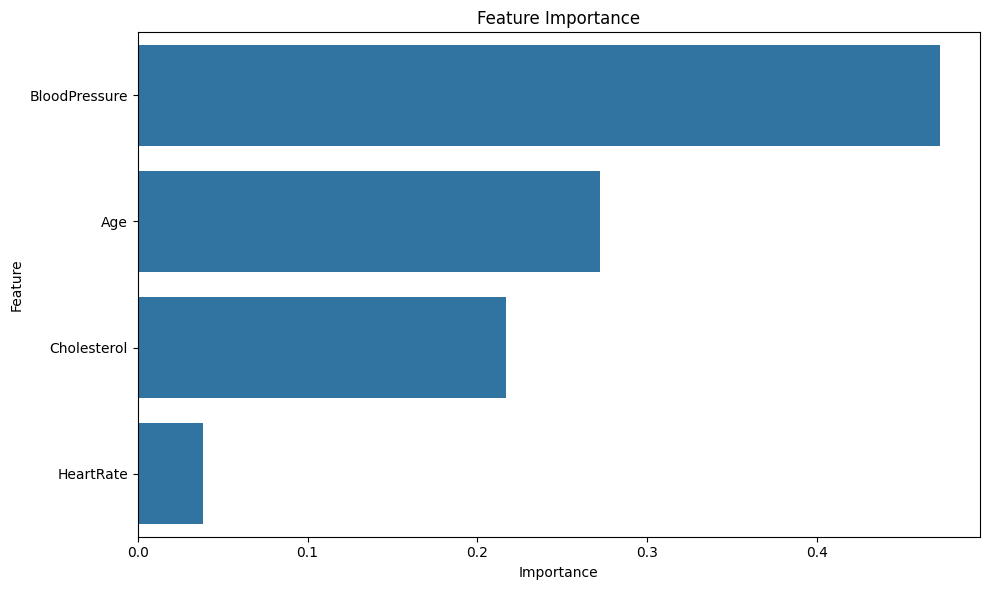

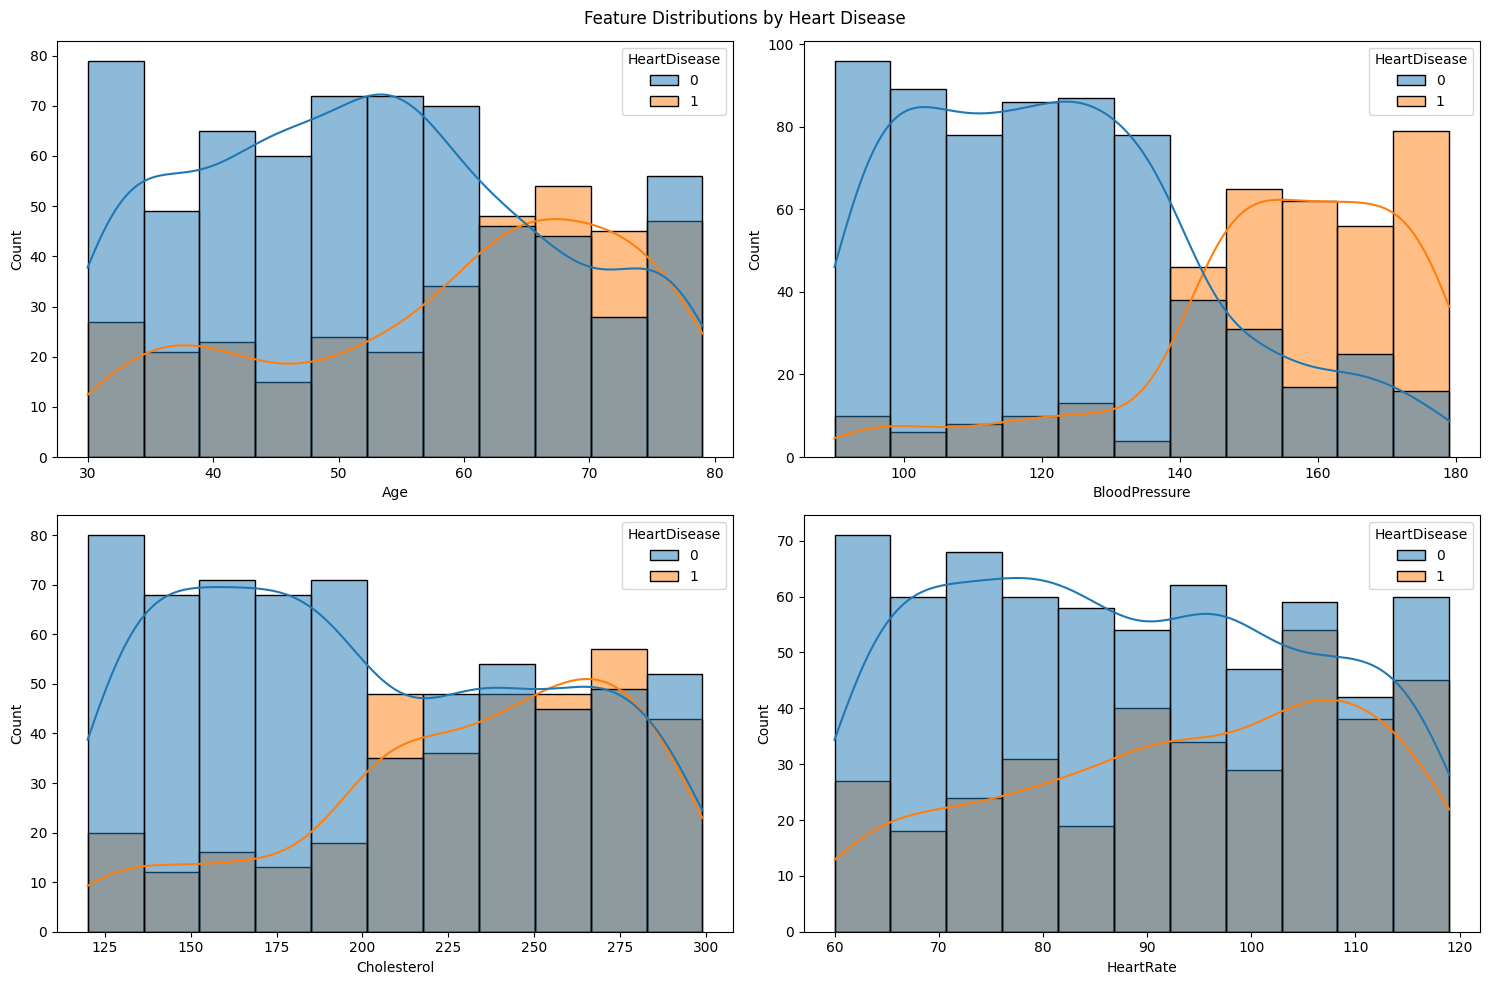

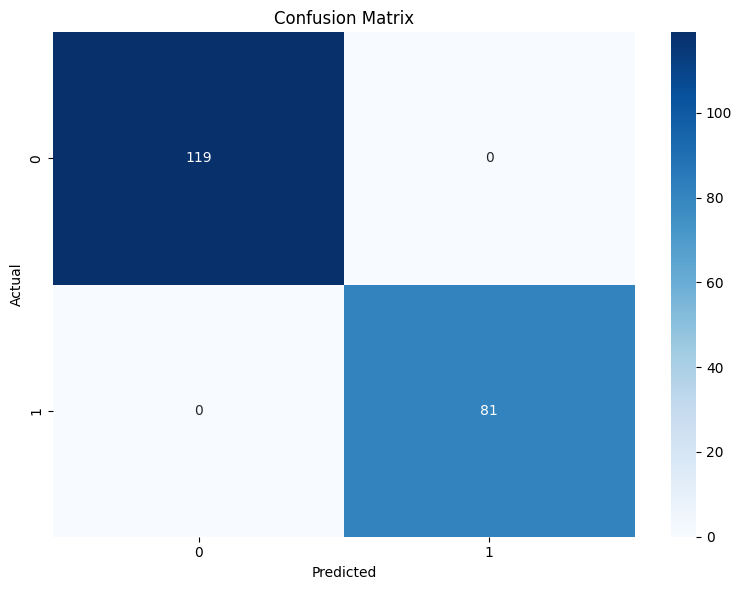

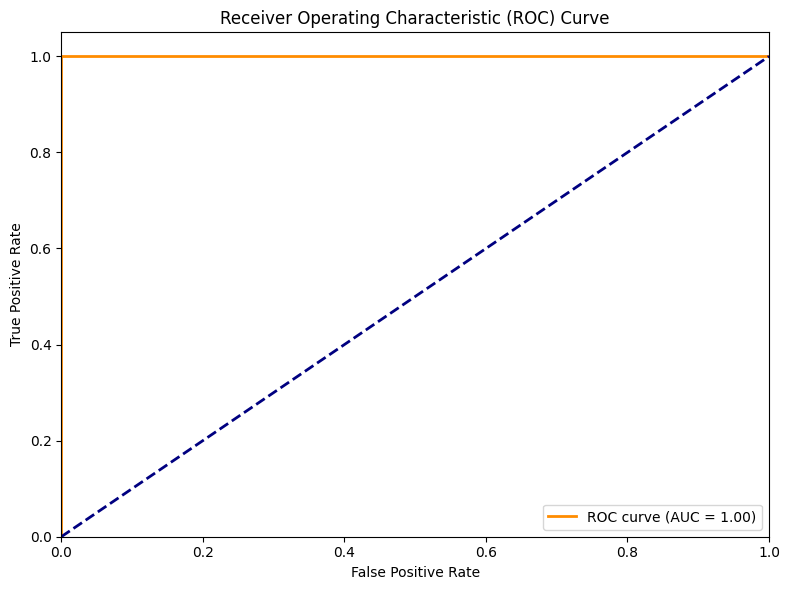

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Generate a synthetic dataset (replace this with real data in practice)
np.random.seed(42)
n_samples = 1000

age = np.random.randint(30, 80, n_samples)
blood_pressure = np.random.randint(90, 180, n_samples)
cholesterol = np.random.randint(120, 300, n_samples)
heart_rate = np.random.randint(60, 120, n_samples)

# Create a risk factor based on these features
risk = (age > 60) * 2 + (blood_pressure > 140) * 3 + (cholesterol > 200) * 2 + (heart_rate > 100) * 1
heart_disease = (risk > 4).astype(int)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'BloodPressure': blood_pressure,
    'Cholesterol': cholesterol,
    'HeartRate': heart_rate,
    'HeartDisease': heart_disease
})

# Split the data into features (X) and target (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Function to explain a single prediction
def explain_prediction(model, sample):
    feature_names = X.columns
    tree = model.tree_
    feature = tree.feature
    threshold = tree.threshold

    node = 0
    explanation = []

    while tree.feature[node] != -2:  # -2 indicates a leaf node
        if sample[feature_names[feature[node]]] <= threshold[node]:
            explanation.append(f"{feature_names[feature[node]]} <= {threshold[node]:.2f}")
            node = tree.children_left[node]
        else:
            explanation.append(f"{feature_names[feature[node]]} > {threshold[node]:.2f}")
            node = tree.children_right[node]

    prediction = "Heart Disease" if tree.value[node][0][1] > tree.value[node][0][0] else "No Heart Disease"
    probability = tree.value[node][0][1] / sum(tree.value[node][0])

    return prediction, probability, explanation

# Example: Explain a prediction for a single sample
sample = X_test.iloc[0]
prediction, probability, explanation = explain_prediction(dt_classifier, sample)

print("\nSample data:")
print(sample)
print(f"\nPrediction: {prediction}")
print(f"Probability of Heart Disease: {probability:.2f}")
print("Explanation:")
for step in explanation:
    print(f"- {step}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Plot feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Heart Disease')

for i, feature in enumerate(X.columns):
    sns.histplot(data=data, x=feature, hue='HeartDisease', kde=True, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()